In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
d_parser = lambda x : pd.datetime.strptime (x, '%Y-%m-%d')
df  = pd.read_csv ('../data/cleanedMovieData.csv', parse_dates = ['release_date'], date_parser = d_parser)


In [17]:
df.drop (columns=['Unnamed: 0'], inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                45376 non-null  int64         
 1   genres                45376 non-null  object        
 2   imdb_id               45362 non-null  object        
 3   original_language     45365 non-null  object        
 4   original_title        45376 non-null  object        
 5   popularity            45376 non-null  float64       
 6   production_companies  45376 non-null  object        
 7   production_countries  45376 non-null  object        
 8   release_date          45376 non-null  datetime64[ns]
 9   revenue               7407 non-null   float64       
 10  runtime               45130 non-null  float64       
 11  spoken_languages      45376 non-null  object        
 12  title                 45376 non-null  object        
 13  vote_average    

In [19]:
import numpy as np
from collections import Counter

In [20]:
import ast

In [21]:
df.dropna (axis='index', how = 'any', subset = ['genres'], inplace=True)

In [22]:
df['genres'] = df.genres.apply(lambda x : ast.literal_eval (x))

In [23]:
genres_count = Counter()
for item in list(df.genres):
    genres_count.update (item)

In [24]:
# genres_count.most_common(8)
genre_pop = pd.Series(genres_count)

In [25]:
genre_pop.sort_values (ascending = False, inplace=True)

In [26]:
pop_num = list(genre_pop.values)
pop_genres = list(genre_pop.index)
pop_genres.reverse()
pop_num.reverse()

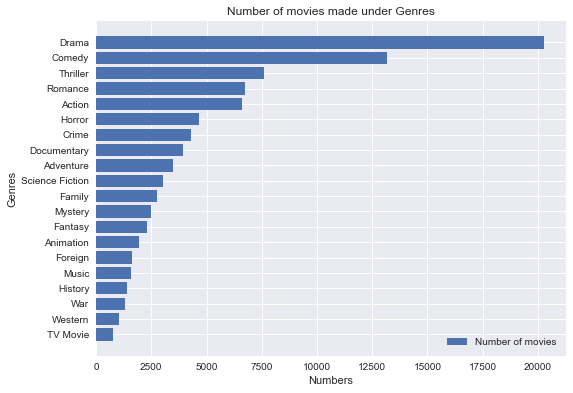

In [32]:
plt.style.use ('seaborn')
plt.xlabel ('Numbers')
plt.title ('Number of movies made under Genres')
plt.ylabel ('Genres')
SMALL_SIZE = 8
MEDIUM_SIZE = 10
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) 
plt.barh (pop_genres, pop_num, label = 'Number of movies')
plt.tight_layout ()
plt.legend()
plt.savefig('../Visualplots/PopularGenres.jpeg')